
# Projeto 2 - SCC0252 (Visualização Computacional)


*   Otávio Ferracioli Coletti - 11767796
*   Fernando César Lopes Barbosa Filho - 10260559

\\


---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# Bibliotecas importadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import Series

A nossa análise exploratória de dados se refere ao dataset de músicas do Spotify.

Se for rodar coloque o SpotifyFeatures.csv nos arquivos do colab e remova a linha comentada abaixo

In [5]:
#df = pd.read_csv('/content/drive/MyDrive/VIS_COMP/SpotifyFeatures.csv')
df = pd.read_csv('SpotifyFeatures.csv')

## Pré-processamento

Aqui temos uma pequena amostra que ilustra o tipo de dado que estaremos utilizando.

In [4]:
df.sample(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
2625,Alternative,Slipknot,"Vermilion, Pt. 2",0O7lENhqOySbsL743G7PqD,64,0.334000,0.589,224320,0.442,0.000424,E,0.0987,-8.517,Major,0.0291,122.688,3/4,0.0904
110058,Pop,Kelsea Ballerini,Peter Pan,2wqXQjOmQ9KoBm9Ssgt4Fo,66,0.028400,0.514,200040,0.659,0.000000,C#,0.2660,-6.142,Major,0.0309,76.483,4/4,0.4630
72876,Children's Music,The American Boychoir,Alleluia (feat. Benjamin P. Wenzelberg),2jMhklmqW6Qca5G0vYFqx8,14,0.982000,0.448,128093,0.217,0.571000,D,0.0605,-13.998,Major,0.0311,99.727,4/4,0.3740
150938,Pop,Kiana Ledé,Big Spender (feat. Prince Charlez),0mYNxaedZsptTWmaqy2PoB,64,0.128000,0.587,195173,0.739,0.000386,C#,0.3880,-5.410,Minor,0.2540,78.796,4/4,0.8650
10105,Alternative,Thousand Foot Krutch,Running With Giants,779WN5O6INolMxc4RNBlnu,46,0.000294,0.541,248866,0.818,0.000000,B,0.2270,-5.505,Minor,0.0782,157.983,4/4,0.5700


Ao chamar o método *describe()*, observamos que muitos dos atributos que iremos usar para analisar as músicas já estão normalizados entre 0 e 1. Isso facilitará muito nossas análises. \\

Provavelmente não teremos valores faltantes já que o *count* foi exatamente o número de linhas do dataset.

In [5]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [6]:
df.shape

(232725, 18)

Como *loudness* e *popularity* não estão normalizados, iremos normalizá-los utilizando min-max para podermos utilizar visualizações e algoritmos que são sensíveis à magnitude das váriaveis.

In [7]:
df['popularity']=(df['popularity']-df['popularity'].min())/(df['popularity'].max()-df['popularity'].min())
df['loudness']=(df['loudness']-df['loudness'].min())/(df['loudness'].max()-df['loudness'].min())

In [8]:
num_null = len((df.isnull().sum()))

num_nan = len((df.isna().sum()))

num_duplicados = df.duplicated().sum()


if num_null == len(df.columns):
  print('Thre isn´t Null values')

if num_nan == len(df.columns):
  print('There isn´t Nan values')

if num_duplicados == 0:
  print('There isn´t duplicated values')

Thre isn´t Null values
There isn´t Nan values
There isn´t duplicated values


Verificamos que não há linhas com valores *Null*, *NaN* ou duplicados, porém vimos em alguns plots que existem muitas músicas com o mesmo nome da música e do artista. Não sabemos exatamente o motivo disso, pois quando é um relançamento ou um remix geralmente é especificado no nome. \\

Por conta desse problema implícito de duplicação, vamos remover essas repetições do nosso dataset através do seguinte código:

In [9]:
musicas = list(df['track_name'].duplicated())
artistas = list(df['artist_name'].duplicated())
tamanho = len(df)

index_list = []

for i in range(0,tamanho):
  if musicas[i] and artistas[i]:
    index_list.append(i)

df = df.drop(index=index_list)
df = df.reset_index(drop=True)

In [10]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.00,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,0.900856,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.01,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,0.834469,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.03,0.9520,0.663,170267,0.131,0.000000,C,0.1030,0.686429,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.00,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,0.716695,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.04,0.9500,0.331,82625,0.225,0.123000,F,0.2020,0.557054,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151145,Soul,H-Town,They Like It Slow,2XoAEpBuM4AtQIQYUEowRy,0.39,0.1130,0.611,279510,0.493,0.000000,C#,0.1050,0.767958,Major,0.0354,115.920,4/4,0.443
151146,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,0.39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,0.856070,Minor,0.1000,99.991,4/4,0.770
151147,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,0.43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,0.772993,Major,0.2130,175.666,4/4,0.482
151148,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,0.809825,Minor,0.0337,113.830,4/4,0.969


In [11]:
df.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity          float64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [12]:
df['genre'].value_counts()

Comedy              8665
Classical           8448
Alternative         8408
Anime               8282
Opera               8110
Electronic          7984
Soundtrack          7465
Reggaeton           7414
Blues               7338
Movie               6970
Reggae              6913
Dance               6787
Folk                6732
World               6477
Ska                 6465
Country             6433
Jazz                6329
Hip-Hop             6196
Children's Music    4203
R&B                 4022
Soul                3056
Indie               2544
Pop                 1864
Rock                1727
Rap                 1189
Children’s Music    1010
A Capella            119
Name: genre, dtype: int64

Percebemos aqui que há dois *Children's Music*. Fazemos assim uma substituição.

In [13]:
df = df.replace('Children’s Music','Children\'s Music')

Nos interessa saber quais as características das músicas mais populares. Para isso, ordenaremos nosso dataset por ordem de popularidade.

In [14]:
df = df.sort_values('popularity', ascending=False)

In [15]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
8616,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,1.00,0.5780,0.725,178640,0.321,0.000000,C#,0.0884,0.742211,Minor,0.3230,70.142,4/4,0.319
68795,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,0.99,0.1630,0.833,149520,0.539,0.000002,B,0.1010,0.801730,Minor,0.1780,99.947,4/4,0.385
8615,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,0.99,0.0421,0.726,190440,0.554,0.000000,F,0.1060,0.839256,Minor,0.0917,169.999,4/4,0.335
54586,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,0.98,0.1100,0.737,193227,0.860,0.000002,G#,0.0574,0.886194,Minor,0.0593,93.989,4/4,0.656
77833,Pop,Sam Smith,Dancing With A Stranger (with Normani),6Qs4SXO9dwPj5GKvVOv8Ki,0.97,0.4500,0.741,171030,0.520,0.000002,G#,0.2220,0.799701,Major,0.0656,102.998,4/4,0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60506,Children's Music,Kimbo Children's Music,The Poodle Hop 4/4,5WNKuYQym5XP2fTN2fAJMP,0.00,0.7520,0.645,110987,0.529,0.000075,C,0.1150,0.742674,Minor,0.0914,161.699,4/4,0.960
60507,Children's Music,Kimbo Children's Music,Pretty Rose- Instrumental,5bpFbGutisud7OmIhhIuIy,0.00,0.9690,0.472,75040,0.338,0.886000,C,0.1140,0.707585,Major,0.0465,124.788,4/4,0.981
60508,Children's Music,Kimbo Children's Music,Jumping Jacks (Gross Motor Coordination),5hd8U7ujUDc1dGrHTPJsoB,0.00,0.4960,0.420,76627,0.271,0.000061,G,0.0896,0.622622,Minor,0.0286,98.428,4/4,0.631
60509,Children's Music,Kimbo Children's Music,Balance',5hx3r6PHNDKSSjEH6HzrFK,0.00,0.9730,0.631,43267,0.144,0.000015,C,0.1080,0.786854,Major,0.0373,143.076,3/4,0.945


Removeremos as colunas *key*, *time_signature* e *mode*, que não serão utilizadas nesta análise.

In [16]:
print(df['time_signature'].value_counts())
df = df.drop(['key'],axis=1)   
df = df.drop(['time_signature'],axis=1)
df = df.drop(['mode'],axis=1)
df = df.reset_index(drop=True)      

4/4    126817
3/4     18337
5/4      3910
1/4      2080
0/4         6
Name: time_signature, dtype: int64


In [17]:
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,1.00,0.5780,0.725,178640,0.321,0.000000,0.0884,0.742211,0.3230,70.142,0.319
1,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,0.99,0.1630,0.833,149520,0.539,0.000002,0.1010,0.801730,0.1780,99.947,0.385
2,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,0.99,0.0421,0.726,190440,0.554,0.000000,0.1060,0.839256,0.0917,169.999,0.335
3,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,0.98,0.1100,0.737,193227,0.860,0.000002,0.0574,0.886194,0.0593,93.989,0.656
4,Pop,Sam Smith,Dancing With A Stranger (with Normani),6Qs4SXO9dwPj5GKvVOv8Ki,0.97,0.4500,0.741,171030,0.520,0.000002,0.2220,0.799701,0.0656,102.998,0.347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151145,Children's Music,Kimbo Children's Music,The Poodle Hop 4/4,5WNKuYQym5XP2fTN2fAJMP,0.00,0.7520,0.645,110987,0.529,0.000075,0.1150,0.742674,0.0914,161.699,0.960
151146,Children's Music,Kimbo Children's Music,Pretty Rose- Instrumental,5bpFbGutisud7OmIhhIuIy,0.00,0.9690,0.472,75040,0.338,0.886000,0.1140,0.707585,0.0465,124.788,0.981
151147,Children's Music,Kimbo Children's Music,Jumping Jacks (Gross Motor Coordination),5hd8U7ujUDc1dGrHTPJsoB,0.00,0.4960,0.420,76627,0.271,0.000061,0.0896,0.622622,0.0286,98.428,0.631
151148,Children's Music,Kimbo Children's Music,Balance',5hx3r6PHNDKSSjEH6HzrFK,0.00,0.9730,0.631,43267,0.144,0.000015,0.1080,0.786854,0.0373,143.076,0.945


## Início da análise : Gêneros musicais

Aqui fizemos uma visualização baseada na popularidade média dos gêneros musicais que este dataframe dispõe. \\

Priorizamos uma paleta de cores que se baseasse na popularidade, então os estilos com cores parecidas possuem popularidades semelhantes. \\

É possível ver aqui o padrão de popularidade entre músicas de Pop, Rap, Hip-Hop, Rock e Dance, músicas muito populares entre os jovens, são também muito populares no Spotify, e músicas como Opera, Músicas Infantis e Músicas à Capella que abrangem outras faixas etárias são menos populares 

Abaixo uma função que irá nos ajudar a plotar as características dos gêneros do nosso dataframe.

In [18]:
def genre_rank_calculator(column_selected : str):
  genre_column_selected = df[['genre', column_selected]]
  genre_count = df.groupby('genre')[[column_selected]].count().sort_values(by=column_selected, ascending=True)
  genre_sum = df.groupby('genre')[[column_selected]].sum().sort_values(by=column_selected, ascending=True)


  genre_rank = genre_sum[column_selected] / genre_count[column_selected]
  genre_rank = genre_rank.sort_values(ascending=True)
  genre_rank = pd.DataFrame(genre_rank).reset_index()

  return genre_rank

In [19]:
def plot_genre_rank(genre_rank, y_selected : str, title_selected : str):
  plt.figure(figsize = (36, 6))
  sns.barplot(x='genre', y=y_selected, data=genre_rank)

  plt.xticks(fontsize=14, rotation=40,ha="right")
  plt.yticks(fontsize=14)
  plt.xlabel('Gênero', fontsize=18)
  plt.ylabel(title_selected, fontsize=18)
  plt.title(title_selected + ' média por gênero', fontweight='bold', fontsize=22, color='grey')
  plt.show()

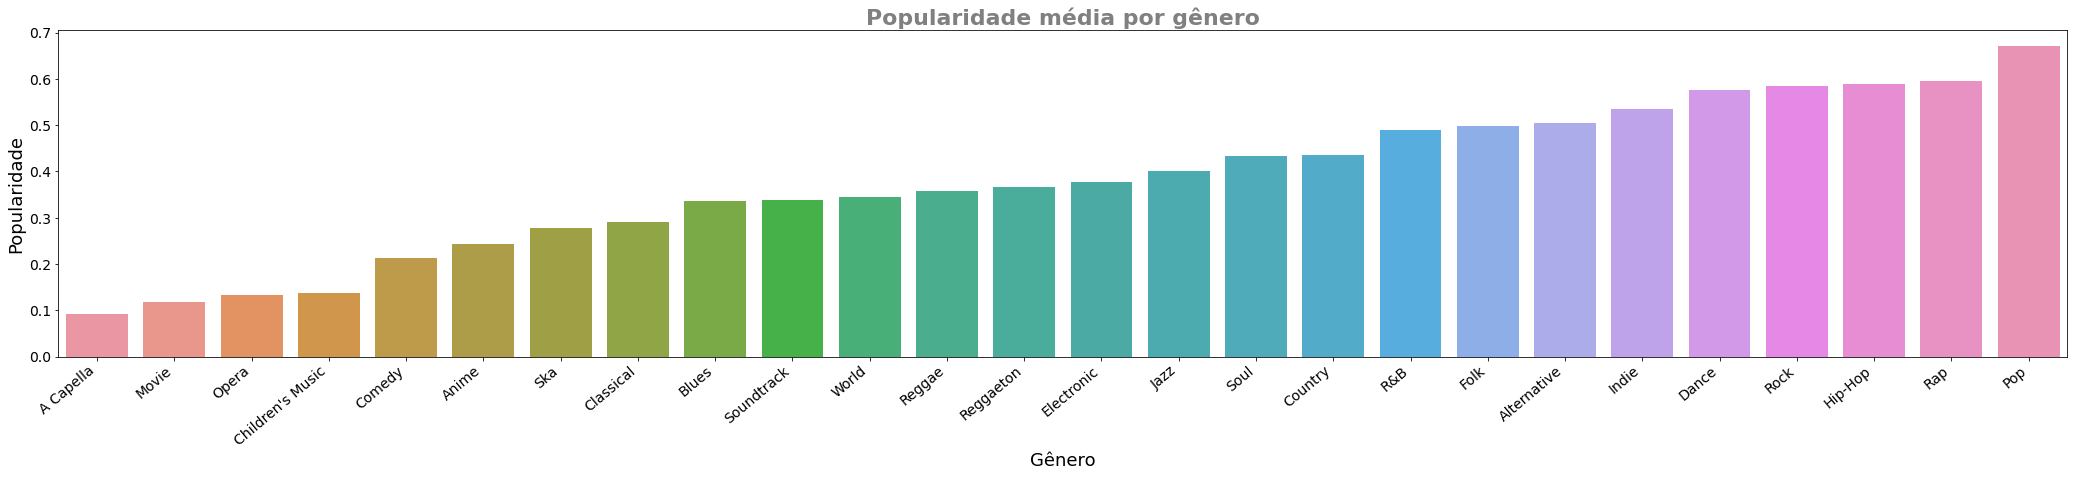

In [20]:
gr = genre_rank_calculator('popularity')
plot_genre_rank(gr,'popularity','Popularidade')

Aqui calculamos a *valence* média de cada gênero, que seria algo como a positividade musical --- quanto maior a valência, mais alegria, felicidade e euforia a música transmite; e quanto menor, mais negativo (triste, deprimido, bravo). \\

O gráfico segue um padrão esperado, já que temos Raggae, Raggaeton e Músicas Infantis entre as mais 'alegres' enquanto Ópera e e Clássicas estão entre as mais 'tristes'.

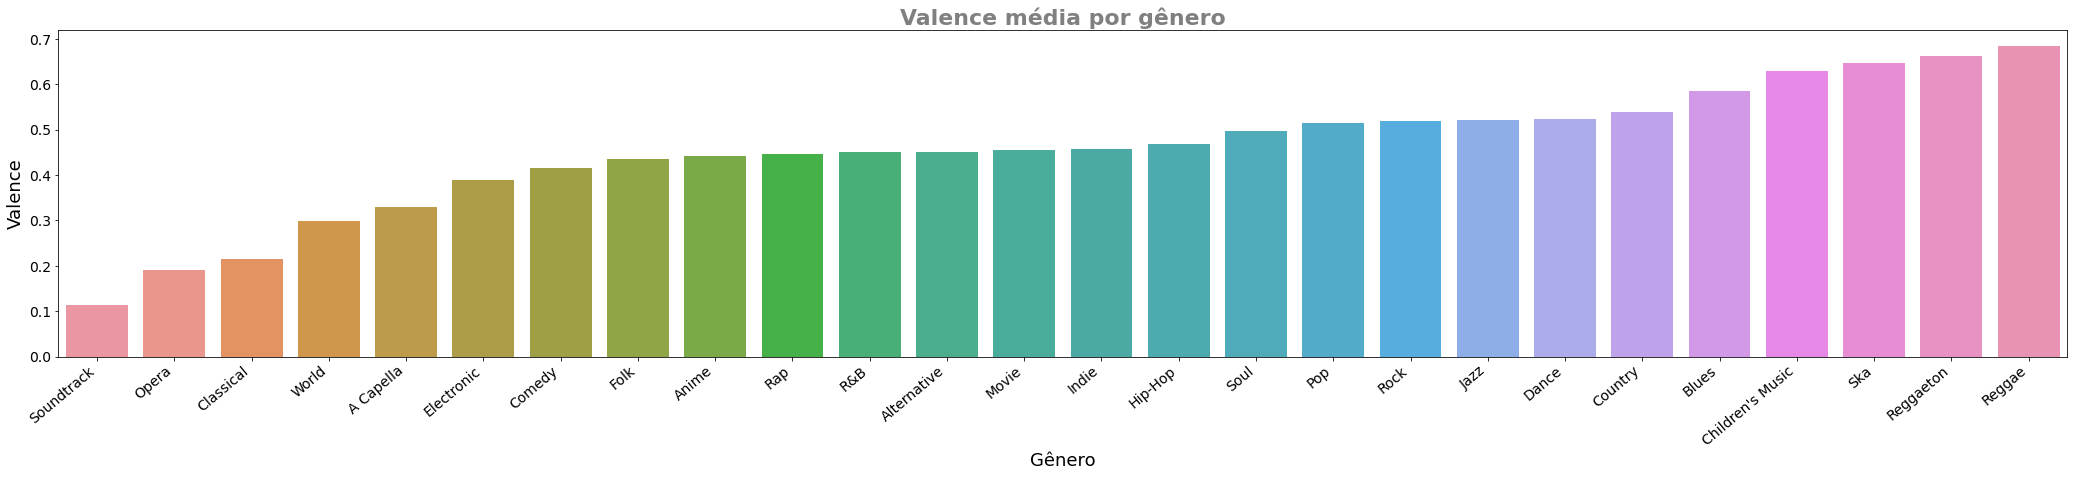

In [21]:
gr = genre_rank_calculator('valence')
plot_genre_rank(gr,'valence','Valence')

Aqui o mesmo para energia média de cada gênero. \\

Analisando a organização do gráfico de barras abaixo, podemos ver semelhanças com o gráfico anterior que indicava a 'positividade' de uma certa música. Infere-se, então, que músicas com bastante energia serão provavelmente positivas (com maior valência). \\

Constataremos que há de fato uma boa correlação entre esses atributos mais adiante.

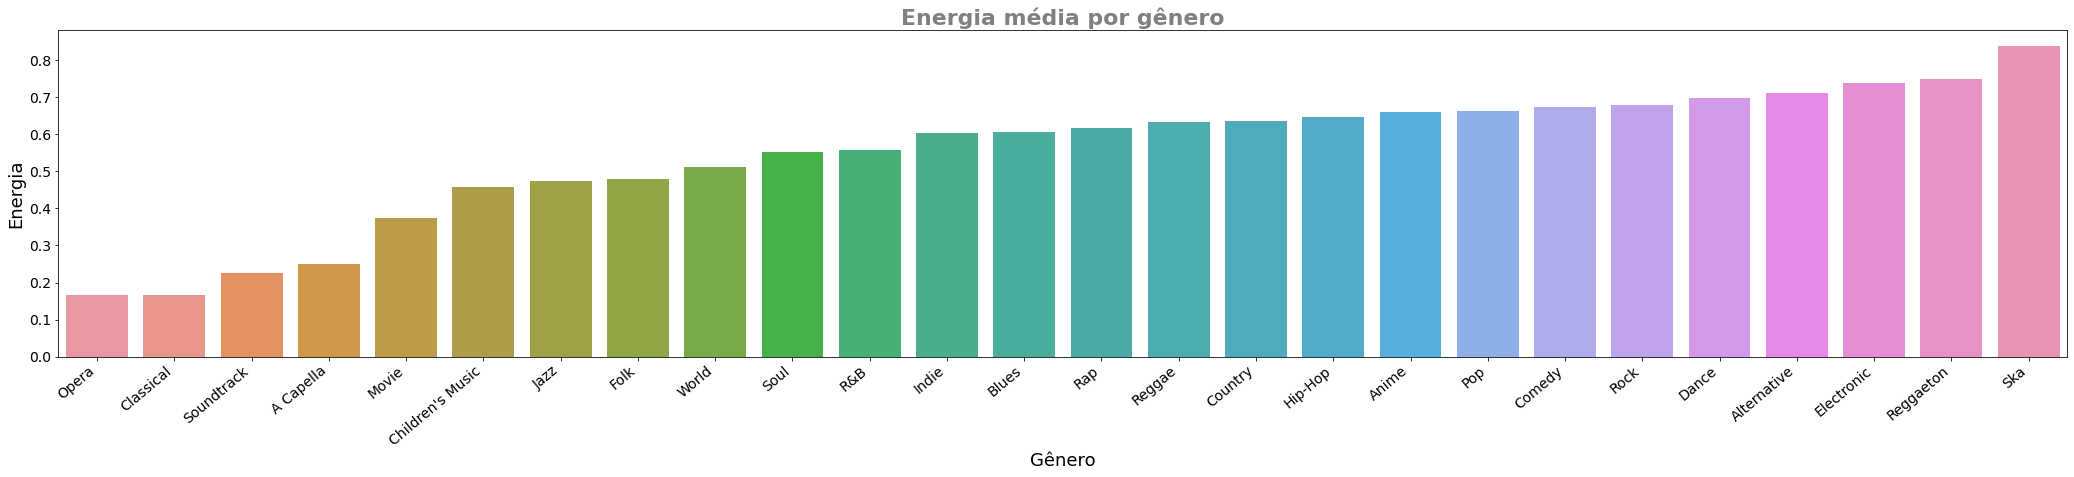

In [22]:
gr = genre_rank_calculator('energy')
plot_genre_rank(gr,'energy','Energia')

Para a acústica, temos um gráfico que segue um padrão oposto ao de energia e positividade, então é de se esperar que as músicas com acústica mais alta tendem a ser músicas mais negativas e tristes.

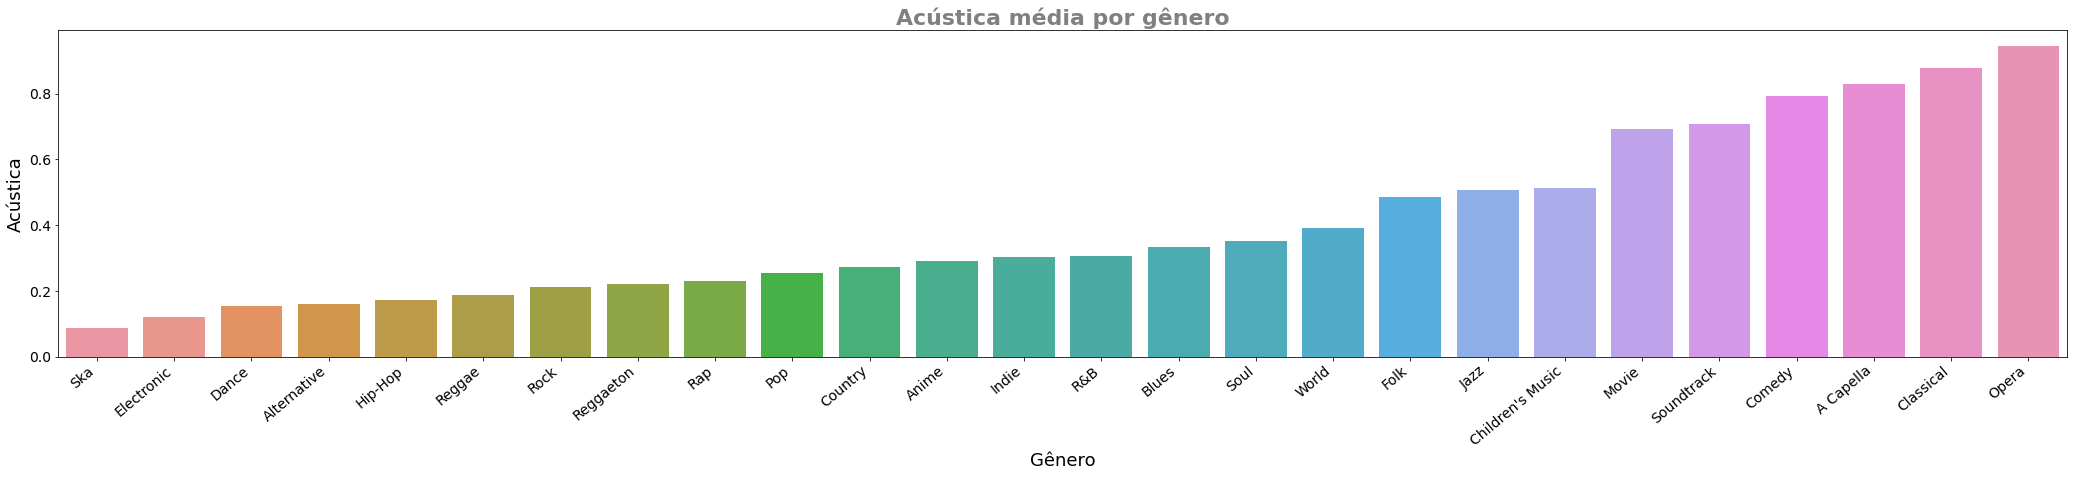

In [23]:
gr = genre_rank_calculator('acousticness')
plot_genre_rank(gr,'acousticness','Acústica')

Para o *speechiness*, por final, que quantifica o quanto uma música é cantada (o quanto a voz humana aparece na faixa), vimos que nas faixas de comédia o *speechiness* é bem alto se comparado com as músicas que tem muitas partes preenchidas por instrumentos.

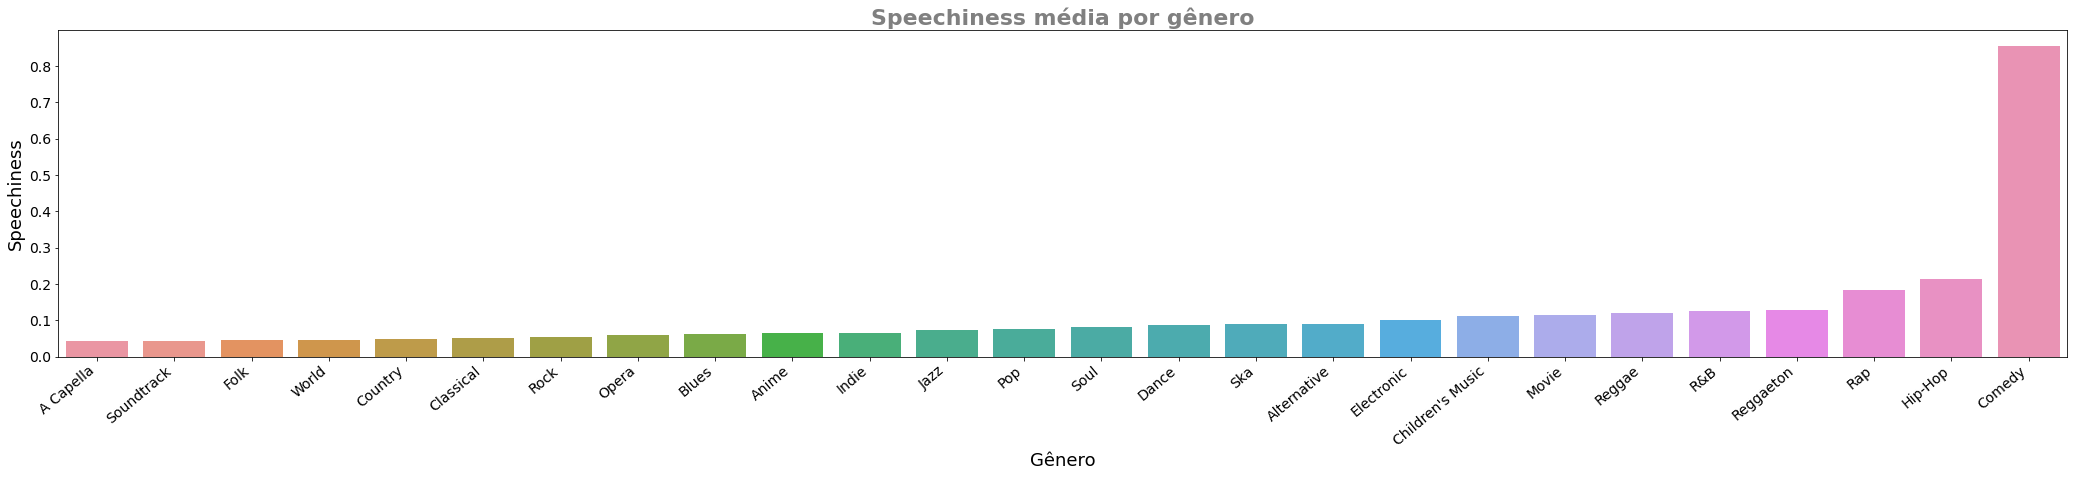

In [24]:
gr = genre_rank_calculator('speechiness')
plot_genre_rank(gr,'speechiness','Speechiness')

## Análise das faixas mais populares (Top 10)

Abaixo temos uma tabela com as músicas mais populares e seus artistas. Veremos suas características e visualizaremos quais são as features mais marcante dessas músicas.

In [25]:
import plotly.express as px

# mais populares por dançabilidade
popular_music_rank = df.sort_values('popularity', ascending=False) 

print(popular_music_rank[['artist_name','track_name','popularity']][0:10].sort_values('popularity', ascending=False))


     artist_name                                     track_name  popularity
0  Ariana Grande                                        7 rings        1.00
2  Ariana Grande       break up with your girlfriend, i'm bored        0.99
1    Post Malone                                           Wow.        0.99
3   Daddy Yankee                                      Con Calma        0.98
5     Marshmello                                        Happier        0.97
6     Pedro Capó                                  Calma - Remix        0.97
7         Halsey                                     Without Me        0.97
8        Ava Max                               Sweet but Psycho        0.97
9    Post Malone  Sunflower - Spider-Man: Into the Spider-Verse        0.97
4      Sam Smith         Dancing With A Stranger (with Normani)        0.97


## Heatmap com os valores de correlação entre as características das músicas mais populares

É possível ver que *energy* e *loudness* estão muito correlacionadas positivamente, já que numa música os seus décibeis estão intimamente ligados com a sua energia. \\

*Valence* que mede a positividade de uma música está positivamente correlacionada com *energy* e *loudness*, então muito provavelmente uma música mais alegre deverá ser uma música com níveis de décibeis acima da média.

Já as músicas com *acousticness* alto, tem níveis mais baixos de energia e barulho pela sua correlação negativa com essas features.

In [26]:
# heatmap so com fetures selecionadas

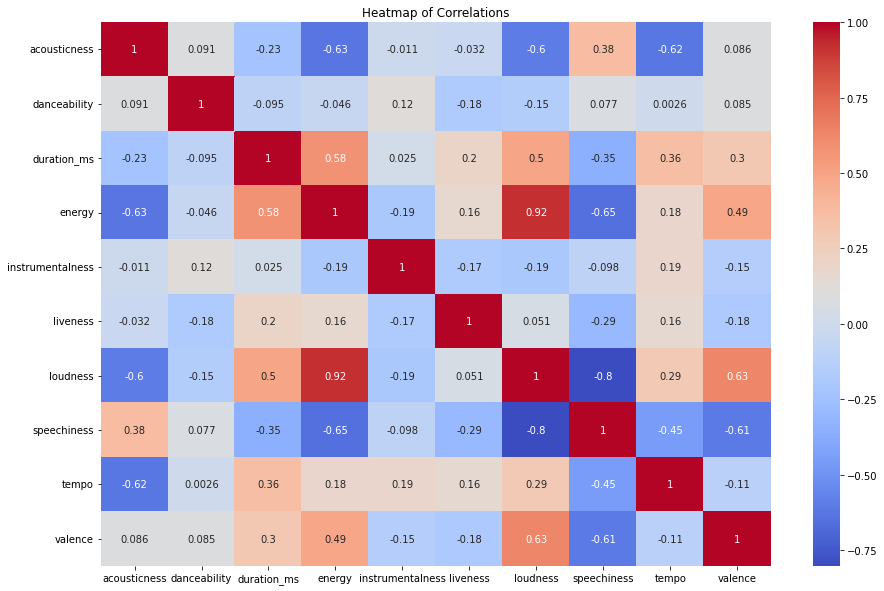

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(popular_music_rank[0:10].drop(['popularity'],axis=1).corr(),annot=True,cmap="coolwarm")
plt.title('Heatmap of Correlations')
plt.show()

In [28]:
popular_music_rank[:10]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,1.00,0.5780,0.725,178640,0.321,0.000000,0.0884,0.742211,0.3230,70.142,0.319
2,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,0.99,0.0421,0.726,190440,0.554,0.000000,0.1060,0.839256,0.0917,169.999,0.335
1,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,0.99,0.1630,0.833,149520,0.539,0.000002,0.1010,0.801730,0.1780,99.947,0.385
3,Hip-Hop,Daddy Yankee,Con Calma,5w9c2J52mkdntKOmRLeM2m,0.98,0.1100,0.737,193227,0.860,0.000002,0.0574,0.886194,0.0593,93.989,0.656
5,Pop,Marshmello,Happier,2dpaYNEQHiRxtZbfNsse99,0.97,0.1910,0.687,214290,0.792,0.000000,0.1670,0.884468,0.0452,100.015,0.671
6,Pop,Pedro Capó,Calma - Remix,5iwz1NiezX7WWjnCgY5TH4,0.97,0.3230,0.826,238200,0.773,0.000000,0.1430,0.858330,0.0524,126.899,0.761
7,Dance,Halsey,Without Me,5p7ujcrUXASCNwRaWNHR1C,0.97,0.2970,0.752,201661,0.488,0.000009,0.0936,0.807939,0.0705,136.041,0.533
8,Dance,Ava Max,Sweet but Psycho,25sgk305KZfyuqVBQIahim,0.97,0.0691,0.719,187436,0.704,0.000000,0.1660,0.849327,0.0476,133.002,0.628
9,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,0.97,0.5560,0.760,158040,0.479,0.000000,0.0703,0.834202,0.0466,89.911,0.913
4,Pop,Sam Smith,Dancing With A Stranger (with Normani),6Qs4SXO9dwPj5GKvVOv8Ki,0.97,0.4500,0.741,171030,0.520,0.000002,0.2220,0.799701,0.0656,102.998,0.347


## Através do gráfico de radar, veremos como se dispõem essas caracteristícas nas 10 músicas mais populares.

In [29]:
import io
import ipywidgets

In [30]:
import plotly.graph_objects as go

cinza = "#808080"
transparente = "rgba(0,0,0,0)"
def radar_chart(number_of_music=1,**ch_list):
  top5 = popular_music_rank[:number_of_music]


  categories = ['valence','acousticness','danceability','energy','liveness','speechiness','instrumentalness','loudness']
  top5 = top5[['valence','acousticness','danceability','energy','liveness','speechiness','instrumentalness','loudness','track_name','artist_name']]
  fig = go.Figure()

  features = []
  for i in categories:
    if ch_list[i]:
      features.append(i)

  for i in range(0,number_of_music):
    fig.add_trace(go.Scatterpolar(
          r=list(top5.iloc[i]),
          theta=features,
          fill='toself',
          name= top5.iloc[i]['track_name'],
          legendgrouptitle_text="Músicas mais populares"
    ))


  fig.update_layout(
        font_color=cinza,
        font_size=15,
        autosize=True,
        height=400,
        margin=dict(l=40, r=40, t=25, b=25),
        paper_bgcolor=transparente,
        polar=dict(
            bgcolor=transparente,
            radialaxis=dict(
                range=[0, 1],
                linecolor=cinza,
                gridcolor=cinza,
                tickcolor=cinza,
            ),
            angularaxis=dict(
                rotation=120,
                direction="clockwise",
                linecolor=cinza,
                tickcolor=cinza,
                gridcolor=cinza,
            ),
        ),
    )

  # fig.update_layout(
  #   polar=dict(
  #     radialaxis=dict(
  #       visible=True,
  #       range=[0, 1]
  #     )),
  #   showlegend=True
  # )
  fig.show()

In [31]:
import ipywidgets as widgets

In [32]:
import random
cb_list = {description: widgets.Checkbox(
    #value=random.choice([True, False]),
    value=True,
    description=description,
    disabled=False,
    indent=False,
) for description in ['valence','acousticness','danceability','energy','liveness','speechiness','instrumentalness','loudness']}

play = widgets.Play(
    value=5,
    min=1,
    max=12,
    step=1,
    interval=1000,
    description="Press play",
    disabled=False
)
# ipywidgets.IntSlider(min=1,max=20,step=1,value=5)
desc = widgets.HTML(
    value="Selecione as features das músicas que deseja colocar no <b>Gráfico de Radar<b> no <b>Checkbox<b>"
)

desc2 = widgets.HTML(
    value="Aperte o Play para que apareçam as 15 músicas mais populares do Spotify no <b>Gráfico de Radar<b>, use o <b>pause e reset<b> </br> se necessário,além disso clique na legenda para que analise somente as músicas que selecionar"
)

In [33]:
desc

HTML(value='Selecione as features das músicas que deseja colocar no <b>Gráfico de Radar<b> no <b>Checkbox<b>')

In [34]:
desc2

HTML(value='Aperte o Play para que apareçam as 15 músicas mais populares do Spotify no <b>Gráfico de Radar<b>,…

In [35]:
ipywidgets.interactive(radar_chart, number_of_music=play,**cb_list)
# play pause e reset e acelera(?)

interactive(children=(Play(value=5, description='Press play', interval=1000, max=12, min=1), Checkbox(value=Tr…

In [36]:
import plotly.graph_objects as go

cinza = "#808080"
transparente = "rgba(0,0,0,0)"
def radar_chart_2(number_of_music=1,**dd_list):
  top5 = popular_music_rank[:number_of_music]

  lista_features = ['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8']
  categories = ['valence','acousticness','danceability','energy','liveness','speechiness','instrumentalness','loudness']
  top5 = top5[['valence','acousticness','danceability','energy','liveness','speechiness','instrumentalness','loudness','track_name','artist_name']]
  fig = go.Figure()

  features = []
  # print(dd_list['valence'])
  for i in lista_features:
    if dd_list[i] != "Nenhum":
      features.append(dd_list[i])

  for i in range(0,number_of_music):
    fig.add_trace(go.Scatterpolar(
          r=list(top5.iloc[i]),
          theta=features,
          fill='toself',
          name= top5.iloc[i]['track_name'],
          legendgrouptitle_text="Músicas mais populares"
    ))


  fig.update_layout(
        font_color=cinza,
        font_size=15,
        autosize=True,
        height=400,
        margin=dict(l=40, r=40, t=25, b=25),
        paper_bgcolor=transparente,
        polar=dict(
            bgcolor=transparente,
            radialaxis=dict(
                range=[0, 1],
                linecolor=cinza,
                gridcolor=cinza,
                tickcolor=cinza,
            ),
            angularaxis=dict(
                rotation=120,
                direction="clockwise",
                linecolor=cinza,
                tickcolor=cinza,
                gridcolor=cinza,
            ),
        ),
    )

  # fig.update_layout(
  #   polar=dict(
  #     radialaxis=dict(
  #       visible=True,
  #       range=[0, 1]
  #     )),
  #   showlegend=True
  # )
  fig.show()

In [37]:
lista_features = ['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8']

In [38]:
charac=['valence','acousticness','danceability','energy','liveness','speechiness','instrumentalness','loudness','Nenhum']

In [39]:
import random
index_list = [0,1,2,3,4,5,6,7,8]
random.seed(117)
dd_radar = {descri: widgets.Dropdown(
    options=charac,
    value=charac[index],
    description=descri,
    disabled=False,
)for index,descri in zip(index_list,['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8']) }




In [40]:
print(dd_radar)

{'Feature 1': Dropdown(description='Feature 1', options=('valence', 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'instrumentalness', 'loudness', 'Nenhum'), value='valence'), 'Feature 2': Dropdown(description='Feature 2', index=1, options=('valence', 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'instrumentalness', 'loudness', 'Nenhum'), value='acousticness'), 'Feature 3': Dropdown(description='Feature 3', index=2, options=('valence', 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'instrumentalness', 'loudness', 'Nenhum'), value='danceability'), 'Feature 4': Dropdown(description='Feature 4', index=3, options=('valence', 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'instrumentalness', 'loudness', 'Nenhum'), value='energy'), 'Feature 5': Dropdown(description='Feature 5', index=4, options=('valence', 'acousticness', 'danceability', 'energy', 'liveness', 'speechiness', 'instrumentalness', 'loudness'

In [41]:
ipywidgets.interactive(radar_chart_2, number_of_music=ipywidgets.IntSlider(min=1,max=15,step=1,value=5),**dd_radar)


interactive(children=(IntSlider(value=5, description='number_of_music', max=15, min=1), Dropdown(description='…

Podemos ver que todas as músicas possuem um *loudness* alto e uma *danceability* significativamente alta também, porém nem todas as faixas têm energia semelhante, essa feature varia entre as 10 mais populares. Já a acústica dessas músicas dificilmente ultrapassa 5. \\

Portanto para ter sucesso é preciso fazer barulho, fazer o pessoal dançar e abusar da eletrônica na sua música! \\

É importante notar que músicas ao vivo (*liveness* alto) não estão presentes aqui, se quer uma música popular, deve gravar em um estúdio. \\

A positividade das 10 músicas mais populares é bem variada e é dificil estabelecer alguma relação dela com outra váriavel usando esse gráfico. \\

É necessário outra visualização, como a do heatmap, para poder afirmar que *valence* tem correlação positiva com a energia e *loudness*; e a mesma coisa para correlação negativa que ela tem com *speechiness*.

## Análise dos Artistas mais populares 

Vamos agora analisar os artistas mais populares e as características que mais aparecem nas suas músicas.

Para não selecionar artistas com apenas um single de sucesso (os 'one hit'), trabalharemos com artistas que possuem 10 ou mais músicas populares para termos como base artistas de sucesso mais consistentes.

In [42]:
vc = df['artist_name'].value_counts()  # contando quantas vezes cada artista aparece

In [43]:
df = df[df['artist_name'].isin(vc.index[vc.gt(10)])]  # selecionando apenas aqueles que aparecem 10 vezes ou mais

In [44]:
artist_count = df.groupby('artist_name')[['popularity']].count().sort_values(by='popularity', ascending=True)
artist_sum = df.groupby('artist_name')[['popularity']].sum().sort_values(by='popularity', ascending=True)

artist_rank = artist_sum.popularity / artist_count.popularity
artist_rank = artist_rank.sort_values(ascending=False)
artist_rank = pd.DataFrame(artist_rank).reset_index()

print(artist_rank[:50])

               artist_name  popularity
0            Billie Eilish    0.805263
1               Juice WRLD    0.751111
2                   Khalid    0.750000
3              Post Malone    0.747692
4                   Offset    0.745000
5                 Coldplay    0.737692
6                  6ix9ine    0.729231
7                Bad Bunny    0.728387
8                 Lil Peep    0.725789
9             Metro Boomin    0.725714
10            XXXTENTACION    0.725192
11              Ed Sheeran    0.721852
12                    LANY    0.720000
13        Hailee Steinfeld    0.719091
14           Alec Benjamin    0.712308
15           Ariana Grande    0.708219
16                    Kygo    0.707778
17            Travis Scott    0.700208
18              Marshmello    0.696875
19         Michael Jackson    0.695714
20               21 Savage    0.691622
21          Camila Cabello    0.688235
22               Sam Smith    0.685882
23           Manuel Turizo    0.684545
24       Twenty One Pilot

Aqui fizemos um gráfico de colunas com os artistas com a média de popularidade alta. Nele podemos ver que muitos dos artistas com músicas entre as 10 mais populares não estão aqui, já que aqui o pódio está sendo formado com cantores que geralmente mantém lançamentos com alta popularidade.

Abaixo vamos selecionar apenas as músicas desses artistas e conhecer quais são suas caracteristicas mais importantes.

In [45]:
top10_artistas = list(artist_rank['artist_name'][0:50])



top10 = pd.DataFrame()

for i in top10_artistas:
  top10 = top10.append(df[df['artist_name'].str.match(i)],ignore_index=True)


As funções abaixo irão nos ajudar a plotar os gráficos que indicarão como são em média as músicas dos artistas mais populares do Spotify.

In [46]:
def artist_rank_calculator(feature : str):
  artist_count = top10.groupby('artist_name')[[feature]].count().sort_values(by=feature, ascending=True)
  artist_sum = top10.groupby('artist_name')[[feature]].sum().sort_values(by=feature, ascending=True)

  artist_rank = artist_sum[feature] / artist_count[feature]
  artist_rank = artist_rank.sort_values(ascending=False)
  artist_rank = pd.DataFrame(artist_rank).reset_index()

  #print(artist_rank)
  return artist_rank

In [47]:
import plotly.express as px
def plot_artist_rank (number_of_artist=1,characterists='valence'):

  ar = artist_rank_calculator(characterists)
  feature = characterists
  title = characterists
  
  fig = px.bar(ar[0:number_of_artist].sort_values(by=feature, ascending=True), y="artist_name", x=feature, color=feature, title="Artistas mais populares e seu " + title + ' médio',orientation='h',width=900, height=700)
  fig.update_layout(xaxis_range=[0,1])
  fig.update_layout(
      font_family="Helvetica",
      font_color="black",
      title_font_family="Helvetica",
      title_font_color="black",
      legend_title_font_color="black"
  )
  fig.update_xaxes(title_font_family="Helvetica")
  fig.show()


In [48]:
def lolipop_chart(artist_rank,feature : str, title : str):
  

  fig = plt.figure( )
  plt.figure(figsize=(15,10))

  plt.ylim(0,1)
  plt.title("Artistas mais populares e seu " + title + ' médio')
  plt.legend( loc='center right', fontsize='larger' )
  plt.stem(artist_rank['artist_name'], artist_rank[feature], label=artist_rank['artist_name'], use_line_collection=True)


  plt.show()

In [49]:
lista_features = ['valence','acousticness','danceability','energy','liveness','speechiness','instrumentalness','loudness']

In [50]:
from ipywidgets import Button, Layout
dd = widgets.Dropdown(
    options=lista_features,
    value='valence',
    description='Atributo da Música',
    disabled=False,
    layout=Layout(width='30%', height='big')
)



In [51]:
desc2 = widgets.HTML(
  value="Escolha qual feature das músicas deseja gerar uma classificação e quantos artistas deseja colocar em seu ranking"
)
desc2

HTML(value='Escolha qual feature das músicas deseja gerar uma classificação e quantos artistas deseja colocar …

In [52]:
ipywidgets.interactive(plot_artist_rank, number_of_artist=ipywidgets.IntSlider(min=1,max=50,step=1,value=10,description='N° artistas'), characterists=dd)

interactive(children=(IntSlider(value=10, description='N° artistas', max=50, min=1), Dropdown(description='Atr…

Vemos que para ser um artista de sucesso você vai ter que dançar muito!!

Concluímos que os artistas mais famosos geralmente possuem maior negatividade do que positividade, o que nos leva a crer que o público geral do Spotify quer sofrência no momento. 😢

Baixa acústica, nada de violãozinho, bateria ou guitarra, nosso público deseja o uso da eletrônica nas músicas mais tocadas. 💻 🎵

Ter a voz presente não é algo que esses artistas se propõe a fazer, a maior parte das suas músicas é preenchida por sons computadorizados.

Em todos os 10 artistas temos a presença de um alto *loudness* em suas músicas.

Agora fazendo o heatmap de todas as músicas podemos ver as correlações indicam que, no geral, músicas positivas (alto valence) tendem a ser músicas dançantes, com energia e com barulho --- e músicas mais acústicas tendem a ter menos energia e menos barulho.

## HeatMAP

In [53]:
def heatmap_interactive(**ch_list):

  categories = ['valence','acousticness','danceability','energy','liveness','speechiness','instrumentalness','loudness']

  features = []
  for i in categories:
    if ch_list[i]:
      features.append(i)

  selection = df[features]


  plt.figure(figsize=(15,10))
  sns.heatmap(selection.corr(),annot=True,cmap="coolwarm")
  plt.title('Heatmap of Correlations')
  plt.show()

In [54]:
cb_list = {description: widgets.Checkbox(
    value=random.choice([True, False]),
    description=description,
    disabled=False,
    indent=False
) for description in ['valence','acousticness','danceability','energy','liveness','speechiness','instrumentalness','loudness']}


In [55]:
desc2 = widgets.HTML(
  value="Selecione  nos Checkboxes as features que deseja comparar a correlação no <b>Heatmap<b>"
)
desc2

HTML(value='Selecione  nos Checkboxes as features que deseja comparar a correlação no <b>Heatmap<b>')

In [56]:
ipywidgets.interactive(heatmap_interactive, **cb_list)


interactive(children=(Checkbox(value=True, description='valence', indent=False), Checkbox(value=True, descript…

Verificaremos como se distribuem as músicas de acordo com essas váriaveis que se apresentaram de alguma forma relacionadas através do heatmap.

## Regplot

In [57]:
def regression_plot(feature_x : str,feature_y :str,title : str):
  data = df.sample(2000)

  plt.figure(figsize=(15,10))
  sns.regplot(x=data[feature_x],y = data[feature_y],scatter_kws={"color": "black"}, line_kws={"color": "red"})
  plt.title(title)
  plt.show()

Vemos que a maioria das músicas se acumulam em regiões opostas do gráfico de dispersão. Isso significa que, dado uma música, provavelmente ou se tem muita acústica e energia muito baixa, ou muita energia e baixa acusticidade.

Nos treemaps abaixo podemos visualizar a hierarquia dos gêneros mais populares, e dentro de cada um deles os cantores que mais possuem músicas populares (suas áreas são proporcionais à soma das popularidades das suas músicas). \\

Obs: É possível interagir com o passar do mouse para ver mais informações, como o nome da música mais popular de um dado artista.

## treemap

In [58]:
def treemap_plot(artist_or_genre, size_selection=10):

  if(artist_or_genre == 'Hierarquia por Artista'):
    fig = px.treemap(popular_music_rank[0:size_selection], path=['artist_name','track_name'],color='genre', values ='popularity',title="Hierarquia das popularidades entre artistas",hover_name='artist_name',width=900, height=700)
  else:
    # fig = px.treemap(popular_music_rank[0:size_selection], path=['genre', 'artist_name'], values ='popularity',title="Participação de cada artista na popularidade de cada gênero musical",hover_name='track_name',width=900, height=700)
    fig = px.treemap(popular_music_rank[0:size_selection], path=['genre'], values ='popularity',title="Hierarquia das popularidades entre artistas",hover_name='genre',width=900, height=700)

  fig.update_traces(root_color="lightgrey")
  fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
  fig.update_layout(
    font_family="Helvetica",
    font_color="black",
  )
  fig.update_xaxes(title_font_family="Helvetica")
  fig.show()

In [59]:
def treemap_plot_2(size_selection=10):


  fig = px.treemap(popular_music_rank[0:size_selection], path=['genre', 'artist_name'], values ='popularity',title="Participação de cada artista na popularidade de cada gênero musical",hover_name='track_name',width=900, height=700)

  fig.update_traces(root_color="lightgrey")
  fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
  fig.update_layout(
    font_family="Helvetica",
    font_color="black",
  )
  fig.update_xaxes(title_font_family="Helvetica")
  fig.show()

Geramos treemaps com 10, 25 e 100 músicas. \\

Nos plots com menos músicas, impera as músicas de Dance e Pop. Mas entre as 100 mais populares, como existem muitas músicas de Hip-Hop, elas acabam ultrapassando as do gênero Pop e formando o quadrado de segunda maior área em nosso treemap. \\

Além disso, temos Ariana Grande com muitas músicas populares mesmo não tendo uma média de popularidade entre as 10 maiores, podendo indicar uma cantora em ascensão no ano em que foi gerado esse dataset.

In [60]:
import pandas as pd
import io
import ipywidgets
import plotly
import numpy as np
import matplotlib.pyplot as plt

In [61]:
ipywidgets.interact(treemap_plot, artist_or_genre=widgets.Dropdown(options=['Hierarquia por Artista','Hierarquia por Gênero Musical'],description='Selecione:'), size_selection=ipywidgets.IntSlider(min=5, max=100,step=5,value=25,description="N° músicas"))

interactive(children=(Dropdown(description='Selecione:', options=('Hierarquia por Artista', 'Hierarquia por Gê…

<function __main__.treemap_plot(artist_or_genre, size_selection=10)>

In [62]:
ipywidgets.interact(treemap_plot_2, size_selection=ipywidgets.IntSlider(min=5, max=100,step=5,value=25,description="N° músicas"))

interactive(children=(IntSlider(value=25, description='N° músicas', min=5, step=5), Output()), _dom_classes=('…

<function __main__.treemap_plot_2(size_selection=10)>

Nos gráficos abaixo utilizamos o Radviz para ver como as músicas de diferentes gêneros se comparam através de alguns atributos selecionados.

Vimos uma semelhança muito grande entre os genêros Pop, Rock e Country. 🎤 🎸 🤠 \\

Muitas músicas desses gêneros tem uma presença de uma *energy* e *danceability* muito altas em comparação com as suas features *speechiness* e *acousticness*. Mesmo sendo estilos que aparentam ser muito diferentes entre si, possuem um radviz muito semelhante quando comparamos essas features.

## radviz

In [63]:
def radviz (genero : str):
  fig = plt.figure( )
  plt.figure(figsize=(15,10))
  atributes = df[['acousticness','energy','danceability','speechiness', 'genre']]
  atributes = atributes[atributes['genre'].isin([genero])].sample(200)

  axes = pd.plotting.radviz(atributes, 'genre',color=['blue'])
  axes.set_title("Disposição das músicas no gênero " + genero)
  axes.legend( loc='center right', fontsize='larger' )

In [64]:
from matplotlib import legend
from matplotlib.spines import rcParams
def radviz_vs (genero_1 : str,genero_2 : str,genero_3 : str, number_of_music=150):
  fig = plt.figure( )
  plt.figure(figsize=(15,10))
  atributes = df[['acousticness','energy','danceability','popularity', 'genre']]
  #atributes = atributes[atributes['genre'].isin([genero_1,genero_2,genero_3])].sample(500)



  pd.plotting.radviz(atributes[atributes['genre'].isin([genero_1])][:number_of_music], 'genre',color=['blue'])

  pd.plotting.radviz(atributes[atributes['genre'].isin([genero_2])][:number_of_music], 'genre',color=['red'])

  pd.plotting.radviz(atributes[atributes['genre'].isin([genero_3])][:number_of_music], 'genre',color=['green'])
  # axes = pd.plotting.radviz(atributes, 'genre',color=['blue','green','red'])
  plt.title("Disposição das músicas dos gêneros ")
  plt.legend( loc='upper right', fontsize='larger' )

In [65]:
# Fazer uma interação para pessoa escolher 3 generos e jogar no radviz

In [66]:
lista_generos = ['Genero 1','Genero 2','Genero 3']

In [67]:
genres=['Dance',
 'Rap',
 'Hip-Hop',
 'Pop',
 'Reggaeton',
 "Children's Music",
 'Folk',
 'Rock',
 'Indie',
 'Electronic',
 'Alternative',
 'Country',
 'Soul',
 'Blues',
 'Jazz',
 'Reggae',
 'R&B',
 'World',
 'Soundtrack',
 'Movie',
 'Classical',
 'Ska',
 'Anime',
 'Opera',
 'Comedy',
 'A Capella']

In [68]:
import random
random.seed(10)
dd = {description: widgets.Dropdown(
    options=['Dance',
 'Rap',
 'Hip-Hop',
 'Pop',
 'Reggaeton',
 "Children's Music",
 'Folk',
 'Rock',
 'Indie',
 'Electronic',
 'Alternative',
 'Country',
 'Soul',
 'Blues',
 'Jazz',
 'Reggae',
 'R&B',
 'World',
 'Soundtrack',
 'Movie',
 'Classical',
 'Ska',
 'Anime',
 'Opera',
 'Comedy',
 'A Capella'],
    value=genres[random.randint(0,len(genres)-1)],
    description=description,
    disabled=False,
)for description in lista_generos }


In [69]:
play2 = widgets.Play(
    value=200,
    min=100,
    max=1000,
    step=25,
    interval=1000,
    description="Press play",
    disabled=False
)

In [70]:
ipywidgets.interact(radviz_vs, genero_1=dd['Genero 1'] ,genero_2=dd['Genero 2'] ,genero_3=dd['Genero 3'],number_of_music=ipywidgets.IntSlider(min=0, max=1000,step=10,value=150,description="N° músicas"))

interactive(children=(Dropdown(description='Genero 1', index=18, options=('Dance', 'Rap', 'Hip-Hop', 'Pop', 'R…

<function __main__.radviz_vs(genero_1: str, genero_2: str, genero_3: str, number_of_music=150)>

Já no gênero Opera e Classical, a *acousticness* é a que carrega os maiores números dentre as faixas desse gênero musical, como podemos ver no gráfico Razviz a seguir --- o que não traz nenhuma surpresa já que são dois estilos que são baseados somente no uso de instrumentos acústicos. 🎹 🎸 🎻 🥁 🎵

Como podíamos esperar, os gêneros Ska e Raggaeton apresentaram uma *energy* e *danceability* altas. Estilos ideais para se remexer bastante! 💃 🕺 💃

In [71]:
# fazer uma consulta sobre onde está a certa música no ranking das populares